In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 定义数据
data_size = 100
omega_prime = 0.6
bias_prime = 1.5

data_x = np.random.uniform(0,10,data_size)
error_dist = np.random.normal(loc = 0,scale = 1,size = data_size)
data_y = data_x * omega_prime + bias_prime
data_y += error_dist
datadict ={"x" : data_x,"y" : data_y}

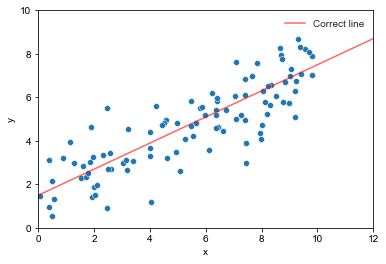

In [3]:
# 数据图
def DrawData(datadict,correct_param,predict_param = None,predict_label = None):
    line_data = {}
    line_data["x"]=np.array([i for i in range(13)])
    line_data["y"] = line_data["x"]*correct_param[0] + correct_param[1]
    if(predict_param!= None):
        line_data_predict = {}
        line_data_predict["x"]=np.array([i for i in range(13)])
        line_data_predict["y"] = line_data["x"]*predict_param[0] + predict_param[1]
        sns.lineplot(x = "x",y="y",data = line_data_predict,color = "g",label = predict_label,alpha = 0.6)
        
    sns.lineplot(x = "x",y="y",data = line_data,color = "r",label = "Correct line",alpha = 0.6)
    
    plt.style.use('seaborn-darkgrid')
    sns.scatterplot(x = "x",y="y",data = datadict)
    plt.xlim((0, 12))
    plt.ylim((0, 10))
    plt.show()
    
DrawData(datadict,[omega_prime,bias_prime])

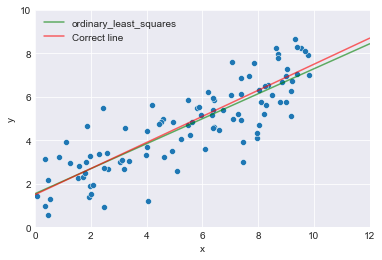

Omega = 0.5746431283995703 
Bias = 1.5448650506922927


In [4]:
# 最小二乘法求解
def ordinary_least_squares(datadict):
    data_size = np.shape(datadict["x"])[0]
    sum_x = datadict["x"].sum()
    omega_buffer = (1/data_size)*sum_x**2 - (datadict["x"]**2).sum()
    omega = ((datadict["x"].mean()-datadict["x"]) * datadict["y"]).sum()
    omega /= omega_buffer
    bias = (1/data_size)* (datadict["y"] - omega*datadict["x"]).sum()
    return(omega,bias)
    
omega,bias = ordinary_least_squares(datadict)
DrawData(datadict,[omega_prime,bias_prime],[omega,bias],"ordinary_least_squares")
print("Omega = {} \nBias = {}".format(omega,bias))

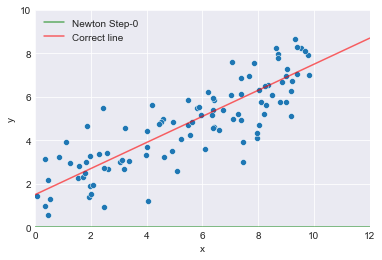

Omega = 0 
Bias = 0


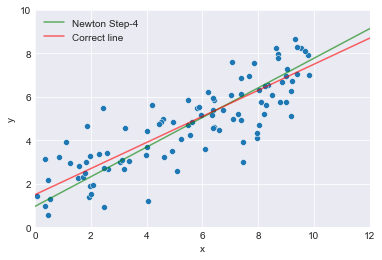

Omega = 0.681318678244549 
Bias = 0.9612792139114924


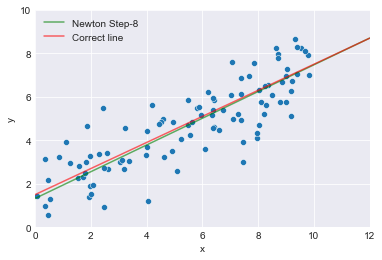

Omega = 0.6149407194366876 
Bias = 1.3244105658565293


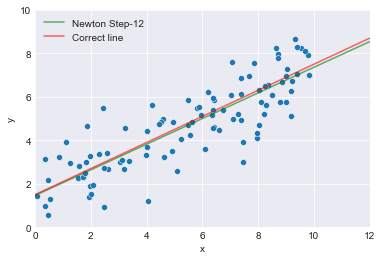

Omega = 0.5898658841833895 
Bias = 1.4615865048106935


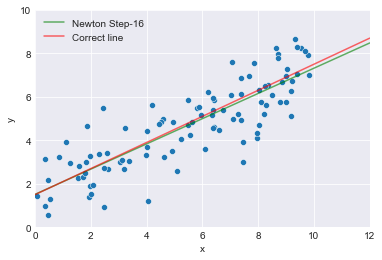

Omega = 0.5803936531254863 
Bias = 1.5134058757550253


In [5]:
# 牛顿法求解
def Newton_method(datadict,init_omega,init_bias):
    data_size = np.shape(datadict["x"])[0]
    omega,bias = init_omega,init_bias
    for i in range(20):
        if(i%4 == 0):
            DrawData(datadict,[omega_prime,bias_prime],[omega,bias],"Newton Step-{}".format(i))
            print("Omega = {} \nBias = {}".format(omega,bias))
        omega_buffer = omega*datadict["x"]+ bias - datadict["y"]
        omega_buffer = (omega_buffer*datadict["x"]).sum()
        omega = omega - omega_buffer/(datadict["x"]**2).sum()
        bias = bias - (1/data_size)*(datadict["x"]*omega + bias - datadict["y"]).sum()
        
Newton_method(datadict,0,0)     
        

In [7]:
# 梯度下降法
def Gradient_descent(datadict,alpha,init_omega,init_bias):
    data_size = np.shape(datadict["x"])[0]
    omega,bias = init_omega,init_bias
    for i in range(1000):
        #if(i%100 == 0):
        #    DrawData(datadict,[omega_prime,bias_prime],[omega,bias],"Gradient_descent Step-{}".format(i))
        #    print("Omega = {} \nBias = {}".format(omega,bias))
        omega_buffer = omega*datadict["x"]+ bias - datadict["y"]
        omega_buffer = (omega_buffer*datadict["x"]).sum()
        omega -= alpha * (1/data_size)*omega_buffer
        
        bias_buffer = (datadict["x"]*omega + bias - datadict["y"]).sum()
        bias -= alpha * (1/data_size)*bias_buffer
        print("Iter step : {} ; Omega : {} ; bias : {}".format(i,omega,bias))
    return(omega,bias)
#Gradient_descent(datadict,0.05,0,0)
Gradient_descent(datadict,0.5,0,0)

Iter step : 0 ; Omega : 15.194144749880845 ; bias : -39.21674071767332
Iter step : 1 ; Omega : -152.3572606454284 ; bias : 399.48341071464034
Iter step : 2 ; Omega : 1678.2174763161647 ; bias : -4388.393995461631
Iter step : 3 ; Omega : -18335.64213716007 ; bias : 47962.194171558396
Iter step : 4 ; Omega : 200466.32649636868 ; bias : -524358.2782998899
Iter step : 5 ; Omega : -2191600.6867432473 ; bias : 5732576.091425313
Iter step : 6 ; Omega : 23959822.428781975 ; bias : -62671750.15229423
Iter step : 7 ; Omega : -261942262.62070423 ; bias : 685162869.209952
Iter step : 8 ; Omega : 2863700335.589064 ; bias : -7490586327.654823
Iter step : 9 ; Omega : -31307584743.833347 ; bias : 81891308041.26111
Iter step : 10 ; Omega : 342272147192.3583 ; bias : -895281896321.4303
Iter step : 11 ; Omega : -3741911862546.9893 ; bias : 9787725865689.268
Iter step : 12 ; Omega : 40908687726883.375 ; bias : -107004931089734.11
Iter step : 13 ; Omega : -447236811824906.94 ; bias : 1169838166152387.0
Ite

C:\Users\10979\anaconda3\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
<ipython-input-7-4d578f08cc1b>:9: RuntimeWarning: invalid value encountered in add
  omega_buffer = omega*datadict["x"]+ bias - datadict["y"]


(nan, nan)

###### 